In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import torch
print(torch.cuda.is_available())  # should print: True


True


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# import os

# train_dir = "/content/drive/MyDrive/weapon_dataset/images/train"
# label_dir = "/content/drive/MyDrive/weapon_dataset/labels/train"

# def sanitize_filenames(img_dir, lbl_dir):
#     for filename in os.listdir(img_dir):
#         if " " in filename:
#             new_name = filename.replace(" ", "_")
#             os.rename(os.path.join(img_dir, filename), os.path.join(img_dir, new_name))
#             # Rename label file too
#             label_file = filename.rsplit(".", 1)[0] + ".txt"
#             new_label_file = new_name.rsplit(".", 1)[0] + ".txt"
#             if os.path.exists(os.path.join(lbl_dir, label_file)):
#                 os.rename(os.path.join(lbl_dir, label_file), os.path.join(lbl_dir, new_label_file))

# sanitize_filenames(train_dir, label_dir)


In [ ]:
# import os

# train_dir = "/content/drive/MyDrive/weapon_dataset/images/val"
# label_dir = "/content/drive/MyDrive/weapon_dataset/labels/val"

# def sanitize_filenames(img_dir, lbl_dir):
#     for filename in os.listdir(img_dir):
#         if " " in filename:
#             new_name = filename.replace(" ", "_")
#             os.rename(os.path.join(img_dir, filename), os.path.join(img_dir, new_name))
#             # Rename label file too
#             label_file = filename.rsplit(".", 1)[0] + ".txt"
#             new_label_file = new_name.rsplit(".", 1)[0] + ".txt"
#             if os.path.exists(os.path.join(lbl_dir, label_file)):
#                 os.rename(os.path.join(lbl_dir, label_file), os.path.join(lbl_dir, new_label_file))

# sanitize_filenames(train_dir, label_dir)


In [ ]:
# from pathlib import Path

# image_dir = Path("/content/drive/MyDrive/weapon_dataset/images/train")
# label_dir = Path("/content/drive/MyDrive/weapon_dataset/labels/train")

# for img_path in image_dir.glob("*.jpeg"):
#     label_path = label_dir / (img_path.stem + ".txt")
#     if not label_path.exists():
#         print(f"Missing label for: {img_path.name}")


In [5]:
from ultralytics import YOLO
import torch

# Check if GPU is available
device = 0 if torch.cuda.is_available() else 'cpu'

# Load pretrained YOLOv8 nano model
model = YOLO("yolov8n.pt")

# Train on GPU with optimized settings
model.train(
    data="/content/drive/MyDrive/dataset.yaml",
    epochs=75,
    imgsz=640,
    batch=16,              # Try increasing to 16 if memory allows
    device=0,         # Use GPU if available
    workers=2,             # Reduce workers to prevent Colab overload
    name="weapon_yolo_gpu"
)

Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=weapon_yolo_gpu2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

100%|██████████| 755k/755k [00:00<00:00, 24.3MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.1±0.1 MB/s, size: 37.7 KB)


train: Scanning /content/drive/MyDrive/dataset/labels/train... 4000 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [24:14<00:00,  2.75it/s]


train: New cache created: /content/drive/MyDrive/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 0.2±0.2 MB/s, size: 57.3 KB)


val: Scanning /content/drive/MyDrive/dataset/labels/val... 156 images, 0 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:56<00:00,  2.77it/s]

val: New cache created: /content/drive/MyDrive/dataset/labels/val.cache


Plotting labels to runs/detect/weapon_yolo_gpu2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/weapon_yolo_gpu2
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75         2G       1.26      2.302      1.525         40        640: 100%|██████████| 250/250 [01:26<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        156        190      0.275      0.321      0.236      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      2.51G      1.352      1.928      1.593         50        640: 100%|██████████| 250/250 [01:21<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        156        190      0.345      0.251      0.228     0.0897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      2.51G      1.388      1.804      1.636         36        640: 100%|██████████| 250/250 [01:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        156        190      0.613      0.242      0.309      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      2.52G      1.363      1.706       1.62         37        640: 100%|██████████| 250/250 [01:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        156        190      0.284        0.2      0.235      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      2.52G      1.311      1.639      1.583         47        640: 100%|██████████| 250/250 [01:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]

                   all        156        190      0.405      0.383      0.393      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      2.53G      1.281      1.528      1.555         36        640: 100%|██████████| 250/250 [01:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]

                   all        156        190      0.348      0.363      0.329      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      2.54G      1.245      1.465      1.529         38        640: 100%|██████████| 250/250 [01:20<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        156        190      0.466      0.411      0.383       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      2.54G      1.225      1.439      1.503         40        640: 100%|██████████| 250/250 [01:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        156        190      0.423      0.454      0.417      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      2.56G      1.207      1.391        1.5         45        640: 100%|██████████| 250/250 [01:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        156        190      0.566      0.383        0.4      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      2.56G       1.18      1.337      1.475         31        640: 100%|██████████| 250/250 [01:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        156        190      0.514       0.44      0.431      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      2.57G      1.161       1.31      1.464         39        640: 100%|██████████| 250/250 [01:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        156        190      0.519      0.451      0.475      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      2.57G      1.142       1.29      1.452         36        640: 100%|██████████| 250/250 [01:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        156        190      0.551      0.494      0.479       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      2.57G      1.146      1.282      1.444         29        640: 100%|██████████| 250/250 [01:19<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        156        190       0.49      0.456      0.475      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      2.58G      1.107      1.225      1.421         47        640: 100%|██████████| 250/250 [01:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]

                   all        156        190      0.519      0.552       0.54      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      2.58G      1.125      1.232      1.421         46        640: 100%|██████████| 250/250 [01:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        156        190      0.525      0.565      0.537      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      2.58G        1.1      1.186      1.405         39        640: 100%|██████████| 250/250 [01:19<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        156        190      0.675      0.547       0.62      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      2.58G      1.111      1.196      1.419         37        640: 100%|██████████| 250/250 [01:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        156        190      0.631      0.494      0.551      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      2.58G      1.098      1.182      1.405         35        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        156        190      0.582      0.538      0.554      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      2.58G      1.074      1.134      1.394         38        640: 100%|██████████| 250/250 [01:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        156        190      0.727      0.586       0.61      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      2.58G      1.076      1.134      1.386         40        640: 100%|██████████| 250/250 [01:16<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        156        190      0.511      0.567      0.517      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      2.58G      1.067      1.098      1.374         48        640: 100%|██████████| 250/250 [01:20<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]

                   all        156        190      0.609      0.584      0.582      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      2.58G      1.046      1.092      1.365         39        640: 100%|██████████| 250/250 [01:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        156        190       0.52      0.553      0.511      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      2.58G      1.044      1.061      1.365         32        640: 100%|██████████| 250/250 [01:19<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        156        190      0.596      0.554      0.567      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      2.58G      1.043      1.077      1.364         33        640: 100%|██████████| 250/250 [01:16<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        156        190      0.516      0.576      0.518      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      2.58G       1.03      1.052       1.36         47        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        156        190      0.578      0.646      0.609      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      2.58G      1.043      1.052      1.356         42        640: 100%|██████████| 250/250 [01:17<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        156        190      0.632      0.641      0.643      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      2.58G      1.031      1.043      1.349         35        640: 100%|██████████| 250/250 [01:19<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        156        190      0.574      0.633      0.586      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      2.58G      1.018      1.016      1.339         31        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        156        190      0.612      0.637      0.641      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      2.58G      1.024      1.022      1.349         39        640: 100%|██████████| 250/250 [01:16<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

                   all        156        190      0.656      0.649      0.656      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      2.58G      1.007      1.008      1.339         46        640: 100%|██████████| 250/250 [01:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]

                   all        156        190      0.615      0.606      0.644      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      2.58G     0.9868      0.976      1.322         34        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

                   all        156        190      0.665      0.522      0.603      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      2.58G     0.9872     0.9776      1.321         46        640: 100%|██████████| 250/250 [01:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]

                   all        156        190      0.668      0.629      0.628      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      2.58G     0.9836     0.9569      1.314         41        640: 100%|██████████| 250/250 [01:16<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        156        190      0.652       0.59       0.64      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      2.59G     0.9884     0.9656       1.32         44        640: 100%|██████████| 250/250 [01:19<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]

                   all        156        190      0.607      0.614      0.605      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      2.59G     0.9719     0.9466      1.308         40        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all        156        190      0.694      0.601      0.666      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      2.59G     0.9791     0.9601      1.307         39        640: 100%|██████████| 250/250 [01:21<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        156        190      0.631      0.629      0.642       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      2.59G      0.956     0.9268      1.298         46        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        156        190      0.616      0.617      0.615       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      2.59G      0.966     0.9418      1.305         35        640: 100%|██████████| 250/250 [01:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        156        190      0.605      0.662      0.634      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      2.59G     0.9531     0.9236      1.293         41        640: 100%|██████████| 250/250 [01:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

                   all        156        190      0.609      0.575      0.596      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      2.59G     0.9618     0.9233      1.301         35        640: 100%|██████████| 250/250 [01:20<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]

                   all        156        190      0.617      0.621      0.627      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      2.59G     0.9515     0.8988      1.291         39        640: 100%|██████████| 250/250 [01:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        156        190       0.61      0.612      0.618      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      2.59G     0.9477     0.8898      1.287         44        640: 100%|██████████| 250/250 [01:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]

                   all        156        190      0.592      0.617      0.628      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      2.59G     0.9516     0.9008      1.283         40        640: 100%|██████████| 250/250 [01:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        156        190      0.673      0.634      0.678       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      2.59G     0.9418     0.8697      1.276         23        640: 100%|██████████| 250/250 [01:20<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]

                   all        156        190      0.673      0.645      0.685      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      2.59G     0.9291     0.8589      1.265         41        640: 100%|██████████| 250/250 [01:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        156        190      0.669      0.601      0.655      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      2.59G     0.9235      0.865      1.271         40        640: 100%|██████████| 250/250 [01:19<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        156        190      0.714      0.632       0.69      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      2.59G      0.924     0.8517      1.264         32        640: 100%|██████████| 250/250 [01:17<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        156        190        0.7      0.664      0.693      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      2.59G     0.9168     0.8403      1.265         34        640: 100%|██████████| 250/250 [01:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        156        190      0.657      0.606      0.633      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      2.59G     0.9158     0.8395       1.26         35        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]

                   all        156        190      0.714      0.615      0.676      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      2.59G     0.9065     0.8309      1.249         43        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        156        190      0.697      0.612      0.674       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      2.59G     0.8945     0.8189      1.248         46        640: 100%|██████████| 250/250 [01:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        156        190      0.627      0.611      0.617      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      2.59G     0.9095     0.8247      1.252         35        640: 100%|██████████| 250/250 [01:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        156        190      0.652      0.623      0.632      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      2.59G     0.9077     0.8177      1.254         41        640: 100%|██████████| 250/250 [01:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        156        190       0.73      0.611      0.652      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      2.59G     0.8895     0.7948      1.246         34        640: 100%|██████████| 250/250 [01:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        156        190      0.749      0.571      0.643      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      2.59G     0.9104     0.8214      1.254         25        640: 100%|██████████| 250/250 [01:19<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]

                   all        156        190      0.656      0.584      0.629      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      2.59G      0.869     0.7785       1.23         36        640: 100%|██████████| 250/250 [01:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        156        190      0.663      0.619      0.643      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      2.59G      0.882     0.7718      1.231         36        640: 100%|██████████| 250/250 [01:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        156        190      0.614      0.653       0.65       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      2.59G       0.87     0.7674      1.232         48        640: 100%|██████████| 250/250 [01:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        156        190      0.666      0.638       0.67      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      2.59G     0.8796     0.7765      1.235         40        640: 100%|██████████| 250/250 [01:21<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        156        190      0.647      0.626      0.662      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      2.59G     0.8714     0.7683      1.229         46        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        156        190      0.708      0.609      0.645      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      2.59G     0.8726     0.7597      1.225         42        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        156        190      0.644      0.622      0.672      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      2.59G     0.8605     0.7533      1.221         40        640: 100%|██████████| 250/250 [01:17<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        156        190      0.639      0.653      0.656       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      2.59G      0.853     0.7444      1.215         38        640: 100%|██████████| 250/250 [01:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        156        190      0.679      0.656      0.654      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      2.59G     0.8615     0.7341       1.22         31        640: 100%|██████████| 250/250 [01:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        156        190      0.727      0.639      0.685      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      2.59G     0.8484     0.7319      1.212         32        640: 100%|██████████| 250/250 [01:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        156        190      0.658      0.622      0.663      0.363


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      2.59G     0.9038     0.6975      1.249         16        640: 100%|██████████| 250/250 [01:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

                   all        156        190       0.68       0.64      0.681      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      2.59G     0.8866     0.6702      1.238         16        640: 100%|██████████| 250/250 [01:15<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        156        190      0.691      0.655       0.66      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      2.59G     0.8775     0.6557      1.234         17        640: 100%|██████████| 250/250 [01:16<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        156        190      0.738      0.607      0.649      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      2.59G      0.866     0.6405      1.223         19        640: 100%|██████████| 250/250 [01:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        156        190      0.732      0.654      0.662      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      2.59G     0.8529     0.6345      1.213         20        640: 100%|██████████| 250/250 [01:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        156        190      0.744      0.644      0.677      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      2.59G     0.8512     0.6094      1.212         18        640: 100%|██████████| 250/250 [01:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        156        190      0.719      0.651      0.672      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      2.59G     0.8427     0.6124      1.207         16        640: 100%|██████████| 250/250 [01:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        156        190      0.774      0.623      0.668      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      2.59G     0.8404     0.6039      1.205         16        640: 100%|██████████| 250/250 [01:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        156        190      0.769      0.636      0.684      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      2.59G     0.8395     0.6029      1.202         15        640: 100%|██████████| 250/250 [01:14<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        156        190      0.788      0.618      0.676      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      2.59G     0.8313      0.588      1.195         18        640: 100%|██████████| 250/250 [01:15<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all        156        190      0.759      0.634      0.679      0.357



75 epochs completed in 1.688 hours.
Optimizer stripped from runs/detect/weapon_yolo_gpu2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/weapon_yolo_gpu2/weights/best.pt, 6.3MB

Validating runs/detect/weapon_yolo_gpu2/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


                   all        156        190      0.679      0.641      0.682      0.369
        Knife Detected         78         90      0.646      0.568      0.596      0.219
          Gun Detected         78        100      0.711      0.715      0.768      0.519
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/weapon_yolo_gpu2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1f98ecc3d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [7]:
import os

# List contents of the runs/detect directory
print(os.listdir("runs/detect"))

# List inside your specific training run
print(os.listdir("runs/detect/weapon_yolo_gpu"))


['weapon_yolo_gpu2', 'weapon_yolo_gpu']
['weights', 'args.yaml']


In [9]:
!find runs/ -name results.csv

runs/detect/weapon_yolo_gpu2/results.csv


Final Evaluation Metrics:
Precision: 0.759
Recall:    0.634
mAP@0.5:   0.679
mAP@0.5:0.95: 0.357


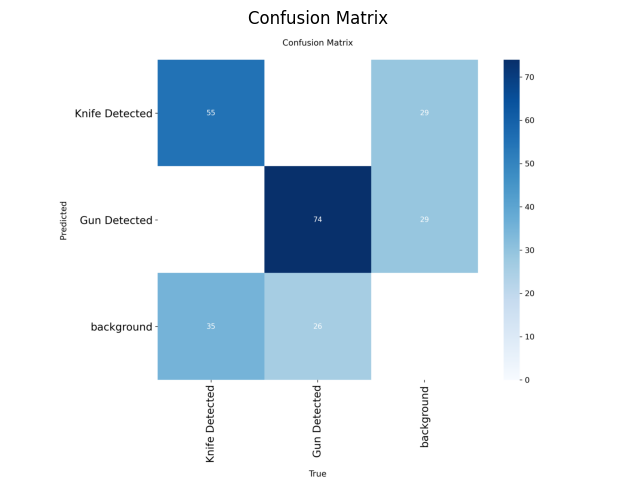

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load metrics
df = pd.read_csv("runs/detect/weapon_yolo_gpu2/results.csv")

# Show final epoch results
last_row = df.iloc[-1]
print("Final Evaluation Metrics:")
print(f"Precision: {last_row['metrics/precision(B)']:.3f}")
print(f"Recall:    {last_row['metrics/recall(B)']:.3f}")
print(f"mAP@0.5:   {last_row['metrics/mAP50(B)']:.3f}")
print(f"mAP@0.5:0.95: {last_row['metrics/mAP50-95(B)']:.3f}")

# Display confusion matrix
img = Image.open("runs/detect/weapon_yolo_gpu2/confusion_matrix.png")
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix")
plt.show()


In [12]:
from google.colab import files
files.download('runs/detect/weapon_yolo_gpu2/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
save_path = "/content/drive/MyDrive/"
